In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 25

FILE = r'data/May18_turnstiledata.csv'
df = pd.read_csv(FILE)

df.rename(columns={'EXITS                                                               ': 'EXITS'}, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace = True)

In [4]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'entry delta', 'exit delta'],
      dtype='object')

In [5]:
deltas = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION']).diff()
deltas.head()

df['entry delta'] = deltas['ENTRIES']
df['exit delta'] = deltas['EXITS']

# drop outliers
df = df[df['entry delta'] > -1]
df = df[df['entry delta'] < 50000]
df = df[df['exit delta'] > -1]
df = df[df['exit delta'] < 50000]

df_deltas = df.groupby(['STATION', 'DATE', 'TIME'])[['entry delta', 'exit delta']].sum()

In [6]:
len(df_deltas[df_deltas['entry delta'] == 0])

6268

In [21]:
# most trafficked station over the time period
dfstat = df_deltas.groupby('STATION').sum()

# identify the top 10 trafficked station by entries
top10entries = dfstat.sort_values('entry delta', ascending=False)[['entry delta']].head(10).reset_index()

In [44]:
top10exits = dfstat.sort_values('exit delta', ascending=False)[['exit delta']].head(10).reset_index()

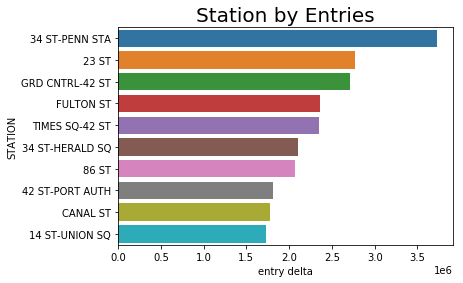

In [45]:
import seaborn as sns

sns.barplot(y = 'STATION', x = 'entry delta', data=top10entries, orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Station by Entries', fontdict={'fontsize': 20});

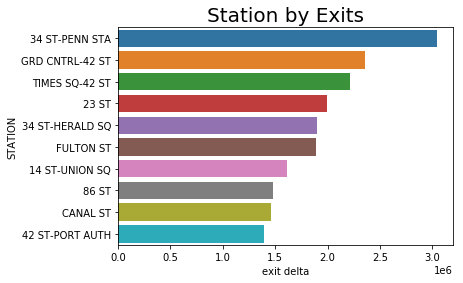

In [48]:
sns.barplot(y = 'STATION', x = 'exit delta', data=top10exits, orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Station by Exits', fontdict={'fontsize': 20});